# Modelo de Regresión Lineal

## Introducción

##### En el siguiente proyecto estaré desarrollando un modelo de machine learning para una compañia de petróleo que desea saber cual es el mejor lugar para abrir 200 nuevos pozos. Estaré estudiando los beneficios y riesgos potenciales basados en los datos sobre muestras de crudo en tres regiones distintas y el modelo deberá seleccionar la región con el mayor márgen de beneficio para la empresa.

### Tabla de contenido:

## 1. Inicialización

In [1]:
#importar librerías
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib as plt 
from sklearn.linear_model import LinearRegression


/var/folders/82/grjgs_q959j1pwfb817_nsl80000gn/T/ipykernel_3637/2248431528.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.2. Cargar datos

In [2]:
#cargar datasets
dataset_0 = pd.read_csv('files /data/geo_data_0.csv')
dataset_1 = pd.read_csv('files /data/geo_data_1.csv')
dataset_2 = pd.read_csv('files /data/geo_data_2.csv')

### 1.2.1. Preparar Dataset 0

In [3]:
#visualizar datos
dataset_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
#visualizar tipo de datos
dataset_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#verificar datos ausentes
dataset_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
#verificar datos duplicados en todo el dataset
print(dataset_0.duplicated().sum())

#verificar datos duplicados en los id
print(dataset_0['id'].duplicated().sum())

0
10


En el dataset 0 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 10 datos duplicados, los cuales voy a eliminar.

In [7]:
#eliminar datos duplicados de la columna ID
dataset_0 = dataset_0.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_0['id'].duplicated().sum()


0

### 1.2.2. Preparar Dataset 1

In [8]:
#visualizar datos
dataset_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [9]:
#verificar informacion general del dataset
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
#verificar datos ausentes
dataset_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [11]:
#verificar datos duplicados en todo el dataset
print(dataset_1.duplicated().sum())

#verificar datos duplicados en los IDs
print(dataset_1['id'].duplicated().sum())

0
4


En el dataset 1 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 4 datos duplicados, los cuales voy a eliminar.

In [12]:
#eliminar datos duplicados de la columna ID
dataset_1 = dataset_1.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_1['id'].duplicated().sum()


0

### 1.2.3. Preparar Dataset 2

In [13]:
#visualizar datos
dataset_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
#visualizar informacion general del dataset
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
#verificar datos ausentes
dataset_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [16]:
#verificar datos duplicados en el dataset completo
print(dataset_2.duplicated().sum())

#verificar datos duplicados en los IDs
print(dataset_2['id'].duplicated().sum())

0
4


En el dataset 2 se visualizan tipos de datos correctos en cada columna y no hay datos ausentes. En cuanto a duplicados, en el dataset completo no encontré ninguno, sin embargo, al revisar la columna de IDs únicos, encontré 4 datos duplicados, los cuales voy a eliminar.

In [17]:
#eliminar datos duplicados de la columna ID
dataset_2 = dataset_2.drop_duplicates(subset='id')

#verificar nuevamente datos duplicados 
dataset_2['id'].duplicated().sum()


0

Ya se encuentran los tres datasets preparados para comenzar a trabajar con ellos.

## 2. Modelo de regresión lineal

In [18]:
#definir variables para entrenar el modelo en el dataset 0
features_0 = dataset_0.drop(['id', 'product'], axis=1)
target_0 = dataset_0['product']

### 2.1. Segmentar el dataset 0 en conjuntos de entrenamiento y validación

In [19]:
#funcion para segmentacion de datos
def data_seg(features, target):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    return features_train, features_valid, target_train, target_valid

In [20]:
#segmentar el dataset 0 en conjuntos de entrenamiento y valiacion 75:25

features_train_0, features_valid_0, target_train_0, target_valid_0 = data_seg(features_0, target_0)

### 2.2. Entrenar el modelo y hacer predicciones para el conjunto de validacion

In [21]:
#entrenar el modelo 
model = LinearRegression()
model.fit(features_train_0, target_train_0)
predictions_valid_0 = model.predict(features_valid_0)

predictions_0 = pd.Series(predictions_valid_0)

### 2.3. Volumen medio de reservas predicho y RMSE del modelo

In [22]:

#calcular RMSE del modelo
mse_model = mean_squared_error(target_valid_0, predictions_0)
rmse_model = mse_model ** 0.05

print('Volúmen medio verdadero de reservas región "0":', target_valid_0.mean())
print('Volúmen medio de reservas predicho por el modelo:', predictions_0.mean())
print('RMSE del modelo:', rmse_model)
print()
print('Volúmen máximo de reserva:', target_valid_0.max())


Volúmen medio verdadero de reservas región "0": 92.15820490940044
Volúmen medio de reservas predicho por el modelo: 92.78915638280621
RMSE del modelo: 1.4381713586741687

Volúmen máximo de reserva: 185.33836970504785


### 2.4. Análisis de resultados


Luego de calcular el RMSE para las prediciones del modelo y obtener un valor de 1.43, me doy cuenta de que el modelo es bastante acertado considerando que estamos manejando un volumen máximo de reservas de hasta 185.33 miles de barriles. De modo que el modelo me parece lo bastante adecuado para la ejecución de la tarea.

### 2.5. Función para modelo de regresión lineal

In [23]:
#funcion para modelo de regresion lineal
def linear_regresion_model(features_train, features_valid, target_train, target_valid):

    #entrenar un modelo de regresion lineal 
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    #realizar predicciones con el conjunto de validacion
    predictions = model.predict(features_valid)
    predictions_valid = pd.Series(predictions)
    
    #crear un dataframe con target_valid y prediction_valid
    data_target_predictions = pd.DataFrame({'prediction_valid': predictions_valid, 'target_valid': target_valid})
    data_target_predictions = data_target_predictions.dropna()
    
    #separar el dataframe concatenado en dos variable
    predictions_to_revenue = data_target_predictions['prediction_valid'].sort_values(ascending=False)
    target_to_revenue = (data_target_predictions['target_valid'])[predictions_to_revenue.index]
    
    #calcular el promedio  de las predicciones del modelo
    predictions_mean = predictions_valid.mean()
    
    #calcular promedio de volumen verdadero de reservas
    target_valid_mean = target_valid.mean()
    
    #calcular RMSE del modelo
    mse_model = mean_squared_error(target_valid, predictions_valid)
    rmse_model = mse_model ** 0.05
    
    #crear variables con las metricas del modelo
    model_metrics = print('Volúmen medio verdadero de reservas en la región:', target_valid_mean),
    print('Volúmen medio de reservas predicho por el modelo:', predictions_mean),
    print('RMSE del modelo:', rmse_model)
        
    return model_metrics, predictions_to_revenue, target_to_revenue

In [24]:
#entrenar modelo en dataset 0 utilizando la funcion
model_metrics_0, predictions_to_revenue_0, target_to_revenue_0 = linear_regresion_model(features_train_0, features_valid_0, target_train_0, target_valid_0)

print('Region "0"', model_metrics_0) 

Volúmen medio verdadero de reservas en la región: 92.15820490940044
Volúmen medio de reservas predicho por el modelo: 92.78915638280621
RMSE del modelo: 1.4381713586741687
Region "0" (None,)


In [25]:
#definir variable en dataset 1
features_1 = dataset_1.drop(['id', 'product'], axis=1)
target_1 = dataset_1['product']

#segmentar datos para el dataset 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_seg(features_1, target_1)

#entrenar modelo en dataset 1
model_metrics_1, predictions_to_revenue_1, target_to_revenue_1 = linear_regresion_model(features_train_1, features_valid_1, target_train_1, target_valid_1)

print('Region "1"', model_metrics_1) 

Volúmen medio verdadero de reservas en la región: 69.18604400957675
Volúmen medio de reservas predicho por el modelo: 69.17831957030432
RMSE del modelo: 0.988642715640864
Region "1" (None,)


En el dataset 1 el modelo también es bantante preciso, con un RMSE de 0.98 en las predicciones.

In [26]:
#entrenando el modelo en dataset 2
features_2 = dataset_2.drop(['id', 'product'], axis=1)
target_2 = dataset_2['product']

#segmentar datos para el dataset 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_seg(features_2, target_2)

#entrenar modelo en dataset 1
model_metrics_2, predictions_to_revenue_2, target_to_revenue_2 = linear_regresion_model(features_train_2, features_valid_2, target_train_2, target_valid_2)

print('Region "2"', model_metrics_1)

Volúmen medio verdadero de reservas en la región: 94.7851093536914
Volúmen medio de reservas predicho por el modelo: 94.86572480562035
RMSE del modelo: 1.4463995400767802
Region "2" (None,)


Finalmente, en el dataset 2, el modelo da un RMSE de 1.44 en las predicciones. 
En los tres casos, el modelo erró entre 0.98 y 1.44. Sin embargo, me parece que el modelo es aceptable en los tres datasets ya que la diferencia no es un número demasiado alto, sobretodo cuando lo comparamos con los volúmenes de reserva máximos con los que estamos trabajando.

## 3. Cálculo de ganancias

In [27]:
#alamcacenar los valores para el cálculo en variables

inversion = 100000000
wells_units = 200
units_per_well_min = inversion / wells_units / 4500

print('Cantidad mínima de unidades de reservas para evitar pérdidas:', units_per_well_min)


Cantidad mínima de unidades de reservas para evitar pérdidas: 111.11111111111111


In [28]:
#calcular la cantidad media de reservas en cada region
print('Media de unidades de reserva en la región "0":', dataset_0['product'].mean())
print('Media de unidades de reserva en la región "1":', dataset_1['product'].mean())
print('Media de unidades de reserva en la región "2":', dataset_2['product'].mean())

Media de unidades de reserva en la región "0": 92.49968421774354
Media de unidades de reserva en la región "1": 68.82391591804064
Media de unidades de reserva en la región "2": 94.99834211933378


### Conclusiones

En promedio, ninguna de las zonas llega al promedio mínimo de reservas que se necesitan para no tener pérdidas con la inversión de 1 millón de dólares.

## 4. Función para el cálculo de las ganancias

In [29]:
#funcion para calcular las ganancias potenciales de los 200 principales pozos por region
def wells_revenue(predictions):
    
    
    #calcular la ganancia potencial en las predicciones
    wells_volum_sum = predictions.sum()
    revenue = wells_volum_sum * 4500 - 100000000
    
    return revenue

In [30]:
#seleccionar los 200 principales pozos por region
top_200_predictions_0 = predictions_to_revenue_0.head(200)
top_200_predictions_1 = predictions_to_revenue_1.head(200)
top_200_predictions_2 = predictions_to_revenue_2.head(200)

#calcular las potenciales ganancias
revenues_0 = wells_revenue(top_200_predictions_0)
revenues_1 = wells_revenue(top_200_predictions_1)
revenues_2 = wells_revenue(top_200_predictions_2)

print('Ganancias potenciales para los 200 principales pozos en la region "0":', revenues_0)
print('Ganancias potenciales para los 200 principales pozos en la region "1":', revenues_1)
print('Ganancias potenciales para los 200 principales pozos en la region "2":', revenues_2)


Ganancias potenciales para los 200 principales pozos en la region "0": 30429876.617481366
Ganancias potenciales para los 200 principales pozos en la region "1": 24291231.090974465
Ganancias potenciales para los 200 principales pozos en la region "2": 25728735.744968355


Luego de calcular las ganancias en las tres regiones obtuve que la mayor cifra la arroja la región "0",  con aproximadamente 30 millones de potenciales ganancias según las prediccines del modelo entrenado.

## 5. Calcular riesgos y ganancias para cada región

### 5.1. Utilizando las predicciones que almacenaste en 4.2, emplea el bootstrapping con 1000 muestras para hallar las distribucion de los beneficios.

In [31]:
#funcion para crear submuestras con bootstrapping
def bootstrap_revenue(predictions):
    
    state = np.random.RandomState(12345)
    values = []
    
    
    for i in range(1000):
        subsamples = predictions.sample(n=500, random_state=state, replace=True)
        values.append(wells_revenue(subsamples))
    
    values = pd.Series(values)
    
    return values

## 5.2 Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje

In [46]:
#calcular el benenifio promedio en el bootstrap
def confindece_risk_interval(predictions):

    #hacer bootstrap de las predicciones
    revenue_subsamples = bootstrap_revenue(predictions)

    #calcular el beneficio promedio de las muestras
    revenue_subsamples_mean = revenue_subsamples.mean()
    
    #calcular el intervalo de confianza del 95% de las ganancias 
    lower_quantile = revenue_subsamples.quantile(0.025)
    upper_quantile = revenue_subsamples.quantile(0.975)

    #calcular el riesgo de pérdidas
    risk_percent = (predictions < 0).sum() / 100

    return revenue_subsamples, revenue_subsamples_mean, lower_quantile, upper_quantile, risk_percent

In [47]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 0
revenue_subsamples_0, revenue_subsamples_mean_0, lower_quantile_0, upper_quantile_0, risk_percent_0 = confindece_risk_interval(predictions_0)

print("Beneficio promedio de ganancias en submuestra de region '0':", revenue_subsamples_mean_0)
print(f"El intervalo de confianza para las ganancias en la region '0' es entre {lower_quantile_0} y {upper_quantile_0} millones")
print(f"Riesgo de pérdidas en región '0': {risk_percent_0} %")

Beneficio promedio de ganancias en submuestra de region '0': 108628294.55149701
El intervalo de confianza para las ganancias en la region '0' es entre 104381466.28003824 y 113305200.47573161 millones
Riesgo de pérdidas en región '0': 0.01 %


In [48]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 1

revenue_subsamples_1, revenue_subsamples_mean_1, lower_quantile_1, upper_quantile_1, risk_percent_1 = confindece_risk_interval(predictions_to_revenue_1)

print("Beneficio promedio de ganancias en submuestra de region '1':", revenue_subsamples_mean_1)
print(f"El intervalo de confianza para las ganancias en la region '1' es entre {lower_quantile_1} y {upper_quantile_1} millones")
print(f"Riesgo de pérdidas en región '1': {risk_percent_1} %")

Beneficio promedio de ganancias en submuestra de region '1': 55522279.76908669
El intervalo de confianza para las ganancias en la region '1' es entre 46675286.379325345 y 64051241.91975471 millones
Riesgo de pérdidas en región '1': 1.19 %


In [57]:
#calcular beneficio promedio, riesgos e intervalo de confianza en region 2

revenue_subsamples_2, revenue_subsamples_mean_2, lower_quantile_2, upper_quantile_2, risk_percent_2 = confindece_risk_interval(predictions_to_revenue_2)

print("Beneficio promedio de ganancias en submuestra de region '2':", revenue_subsamples_mean_2)
print(f"El intervalo de confianza para las ganancias en la region '2' es entre {lower_quantile_2} y {upper_quantile_2} millones")
print(f"Riesgo de pérdidas en región '2': {risk_percent_2} %")

Beneficio promedio de ganancias en submuestra de region '2': 114226838.48281623
El intervalo de confianza para las ganancias en la region '2' es entre 110418952.10991834 y 118080680.3394517 millones
Riesgo de pérdidas en región '2': 0.0 %


## Gráficos

<Axes: >

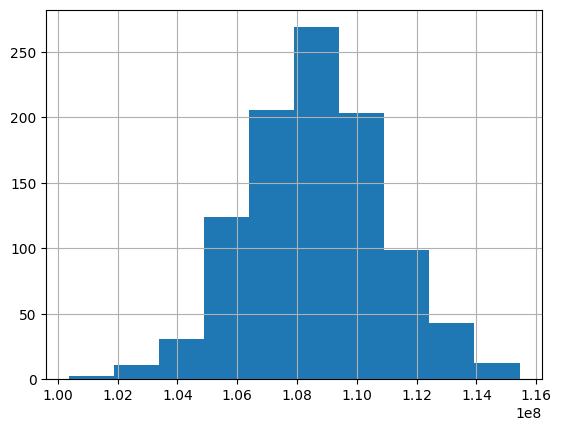

In [54]:
#subsamples_0
revenue_subsamples_0.hist()


<Axes: >

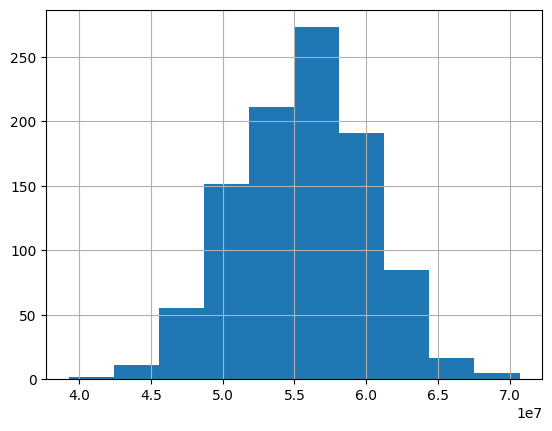

In [56]:
revenue_subsamples_1.hist()

<Axes: >

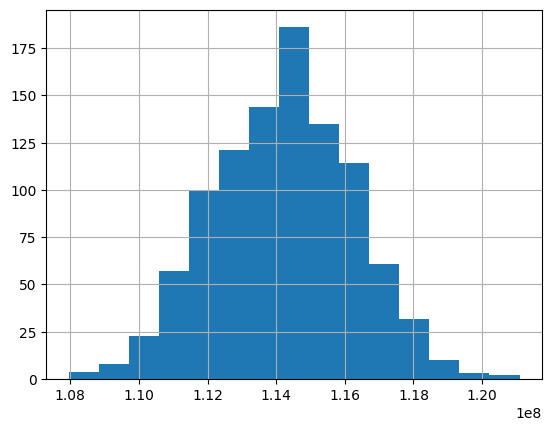

In [61]:
revenue_subsamples_2.hist(bins=15)